<a href="https://colab.research.google.com/github/PUNNYA-P-GAUR/Machine-Learning/blob/main/Medical_iamge_classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import pathlib
import imageio


In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as oddd


In [4]:
oddd.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: punnyaprasoongaur
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:11<00:00, 214MB/s]


In [5]:
base_dir = '/content/chest-xray-pneumonia/chest_xray/'

train_pneumonia_dir = base_dir+'train/PNEUMONIA/'
train_normal_dir=base_dir+'train/NORMAL/'

test_pneumonia_dir = base_dir+'test/PNEUMONIA/'
test_normal_dir = base_dir+'test/NORMAL/'

val_normal_dir= base_dir+'val/NORMAL/'
val_pnrumonia_dir= base_dir+'val/PNEUMONIA/'

train_pn = [train_pneumonia_dir+"{}".format(i) for i in os.listdir(train_pneumonia_dir) ]
train_normal = [train_normal_dir+"{}".format(i) for i in os.listdir(train_normal_dir) ]

test_normal = [test_normal_dir+"{}".format(i) for i in os.listdir(test_normal_dir)]
test_pn = [test_pneumonia_dir+"{}".format(i) for i in os.listdir(test_pneumonia_dir)]

val_pn= [val_pnrumonia_dir+"{}".format(i) for i in os.listdir(val_pnrumonia_dir) ]
val_normal= [val_normal_dir+"{}".format(i) for i in os.listdir(val_normal_dir) ]

print ("Total images:",len(train_pn+train_normal+test_normal+test_pn+val_pn+val_normal))
print ("Total pneumonia images:",len(train_pn+test_pn+val_pn))
print ("Total Nomral images:",len(train_normal+test_normal+val_normal))

Total images: 5856
Total pneumonia images: 4273
Total Nomral images: 1583


In [6]:


# Dataset Splitting (train 80% , test 15% and validation 5% )

# Gathering all pneumina and normal chest X-ray in two python list
pn = train_pn + test_pn + val_pn
normal = train_normal + test_normal + val_normal

# Spliting dataset in train set,test set and validation set.

train_imgs = pn[:3418]+ normal[:1224]  # 80% of 4273 Pneumonia and normal chest X-ray are 3418 and 1224 respectively.
test_imgs = pn[3418:4059]+ normal[1224:1502]
val_imgs = pn[4059:] + normal[1502:]

print("Total Train Images %s containing %s pneumonia and %s normal images" 
      % (len(train_imgs),len(pn[:3418]),len(normal[:1224])))
print("Total Test Images %s containing %s pneumonia and %s normal images"
      % (len(test_imgs),len(pn[3418:4059]),len(normal[1224:1502])))
print("Total validation Images %s containing %s pneumonia and %s normal images" 
      % (len(val_imgs),len(pn[4059:]),len(normal[1502:])))



import random

random.shuffle(train_imgs)
random.shuffle(test_imgs)
random.shuffle(val_imgs)


Total Train Images 4642 containing 3418 pneumonia and 1224 normal images
Total Test Images 919 containing 641 pneumonia and 278 normal images
Total validation Images 295 containing 214 pneumonia and 81 normal images


In [7]:
print(test_imgs[5])

/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person622_bacteria_2494.jpeg


In [8]:
import cv2
img_size = 224

def preprocess_image(image_list):
    
    X = [] # images
    y = [] #labels (0 for Normal or 1 for Pneumonia)
    count=0
    
    for image in image_list:
        
        try:

            img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
            
            img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_CUBIC)
            
            #convert image to 2D to 3D 
            img = np.dstack([img, img, img])
            
            #convrt greyscale image to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Normalalize Image
            img = img.astype(np.float32)/255.
            
            count=count+1

            X.append(img) 
            
            
        except:
            continue
        #get the labels 
        if 'NORMAL' in image:
            y.append(0)
            
        elif 'IM' in image:
            y.append(0)
            
        elif 'virus' or 'bacteria' in image:
            y.append(1)
            
    
    return X, y
X, y = preprocess_image(train_imgs)
# Check all the images getting labels or not
arr=y	
uniqueValues, occurCount = np.unique(arr, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [1224 3418]


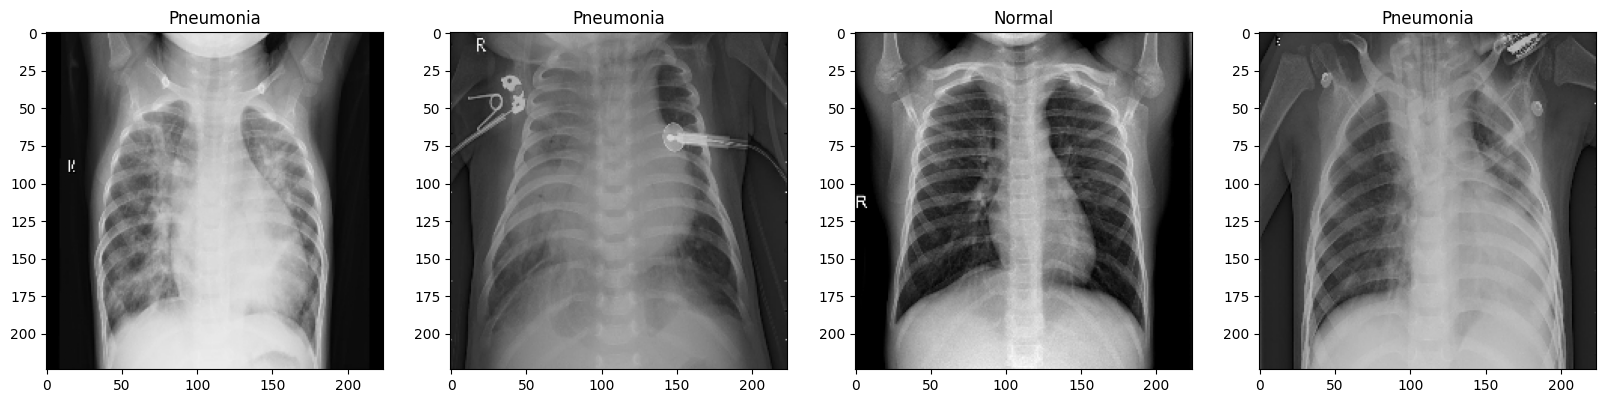

In [9]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (y[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')
        
    plt.imshow(X[i])
    k=k+1;
    

In [10]:
P, t = preprocess_image(test_imgs)

In [11]:
arr=t	
uniqueValues, occurCount = np.unique(arr, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [278 641]


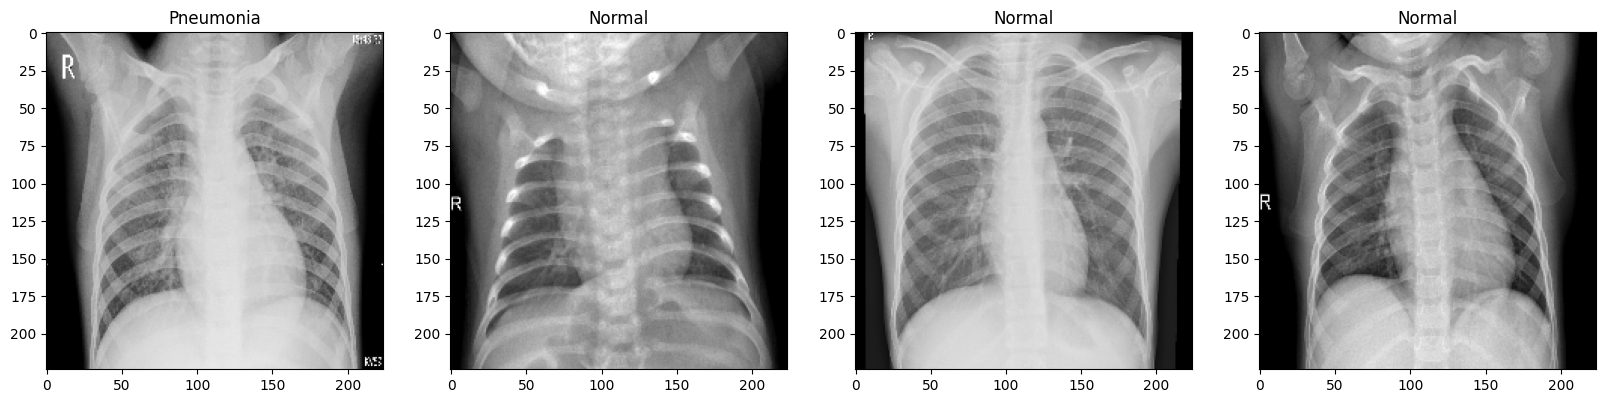

In [12]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (t[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')
        
    plt.imshow(P[i])
    k=k+1;

In [13]:
K, m = preprocess_image(val_imgs)

In [14]:
arr=m

 
# Get a tuple of unique values & their frequency in numpy array
uniqueValues, occurCount = np.unique(arr, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [ 81 214]


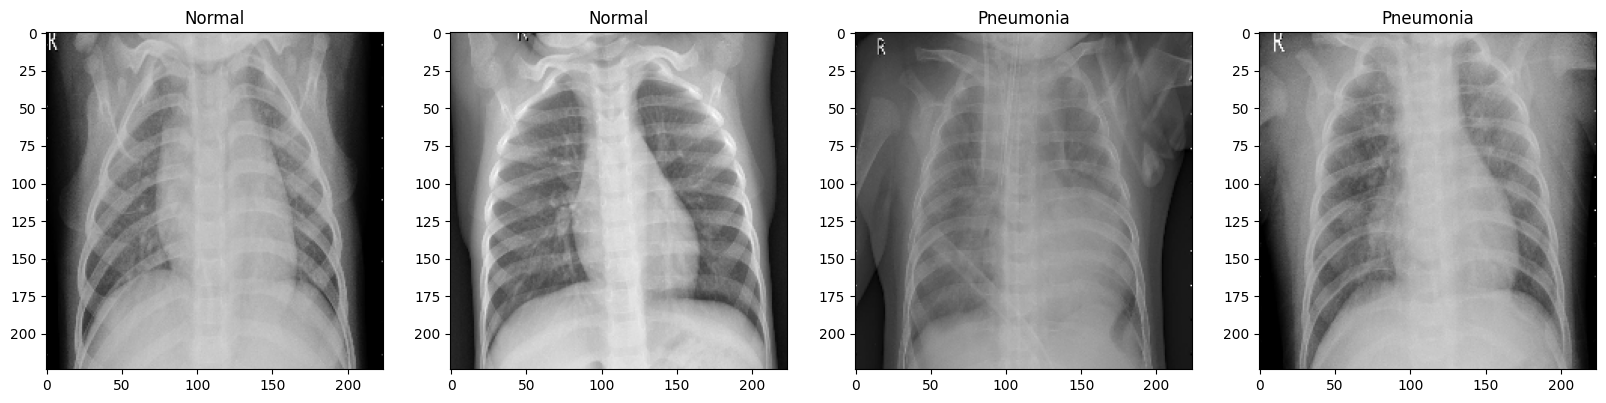

In [15]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (m[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')
        
    plt.imshow(K[i])
    k=k+1;

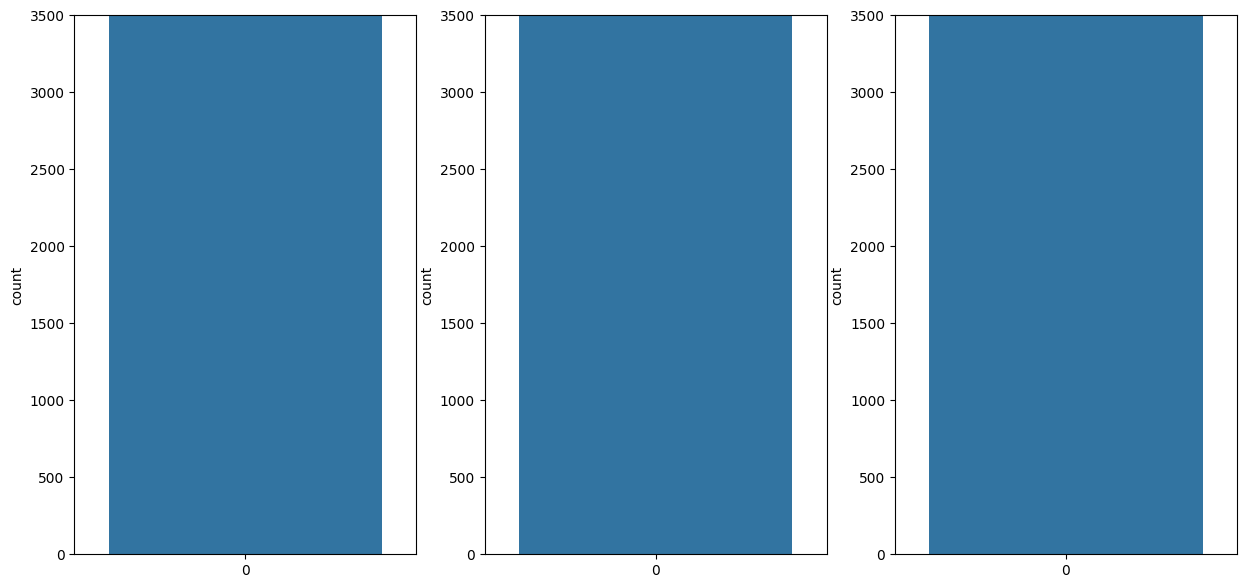

In [16]:
import seaborn as sns


df=pd.DataFrame()
df['Train']=y
df['Test']=pd.Series(t)
df['Val']=pd.Series(m)



fig, ax =plt.subplots(1,3,figsize=(15,7))
sns.countplot(df['Train'], ax=ax[0])
ax[0].set(ylim=(0, 3500))


sns.countplot(df['Test'], ax=ax[1])
ax[1].set(ylim=(0, 3500))

sns.countplot(df['Val'], ax=ax[2])
ax[2].set(ylim=(0, 3500))

fig.show()


In [17]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y),y=y)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 1.8962418300653594, 1: 0.679052077238151}


In [18]:
import seaborn as sns
import gc

train_imgs = train_pn[:3875]+ train_normal[:1341]
del train_imgs
gc.collect()

X_train = np.array(X)
y_train = np.array(y)
X_test = np.array(P)
y_test = np.array(t)
X_val = np.array(K)
y_val = np.array(m)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(4642, 224, 224, 3)
(4642,)
(919, 224, 224, 3)
(919,)
(295, 224, 224, 3)
(295,)


In [19]:
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

batch_size = 32

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(  rotation_range=7,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     shear_range=0.2,
                                     zoom_range=0.45,
                                     horizontal_flip=True)
                                   
val_datagen = ImageDataGenerator(zoom_range=0.45)

In [21]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [22]:
img_size =224

In [23]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import *
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import img_to_array, load_img
from keras.models import Model
from keras import backend as K

# Create the base pre-trained model
# Weights should be none becuase we don't need to train with any pre-trained weights here

base_model = MobileNet(weights=None, include_top=False,input_shape=(img_size, img_size, 3)) 

x = base_model.output

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a logistic layer
predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# Compile model
model.compile(optimizer='adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
# We can see details of  MobileNet architecure's details
# model.summary()


In [24]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size,
                              class_weight =class_weights,
)

<ipython-input-24-0810114e99b4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/64
145/145 [==============================] - 88s 413ms/step - loss: 0.3931 - binary_accuracy: 0.8328 - mae: 0.2196 - val_loss: 0.8738 - val_binary_accuracy: 0.7222 - val_mae: 0.2996
Epoch 2/64
145/145 [==============================] - 60s 411ms/step - loss: 0.2942 - binary_accuracy: 0.8709 - mae: 0.1705 - val_loss: 1.0663 - val_binary_accuracy: 0.7222 - val_mae: 0.2879
Epoch 3/64
145/145 [==============================] - 58s 398ms/step - loss: 0.2724 - binary_accuracy: 0.8757 - mae: 0.1571 - val_loss: 1.2648 - val_binary_accuracy: 0.7292 - val_mae: 0.2752
Epoch 4/64
145/145 [==============================] - 61s 421ms/step - loss: 0.2815 - binary_accuracy: 0.8733 - mae: 0.1643 - val_loss: 1.9304 - val_binary_accuracy: 0.7222 - val_mae: 0.2782
Epoch 5/64
145/145 [==============================] - 58s 397ms/step - loss: 0.2832 - binary_accuracy: 0.8714 - mae: 0.1689 - val_loss: 1.8043 - val_binary_accuracy: 0.4479 - val_mae: 0.5458
Epoch 6/64
145/145 [=========================

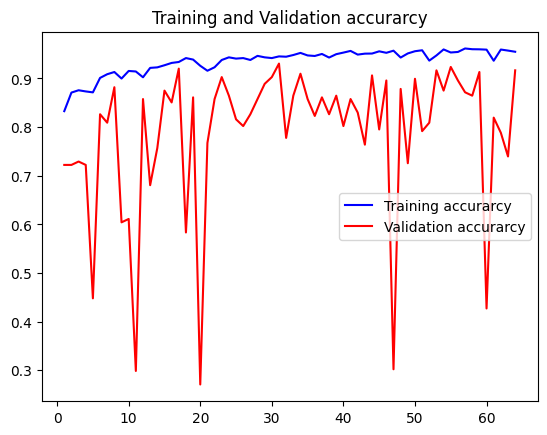

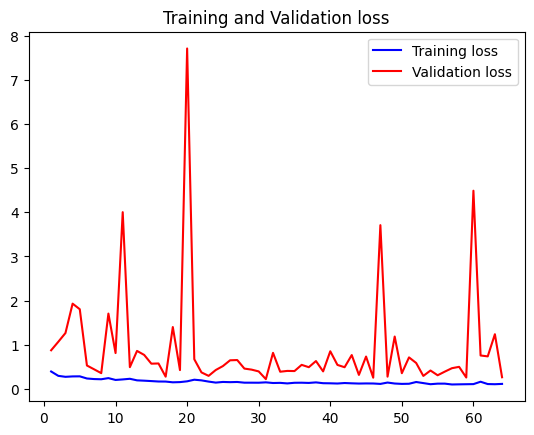

In [25]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(X_test)

acc = accuracy_score(y_test, np.round(preds))*100
cm = confusion_matrix(y_test, np.round(preds))

tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\n============TEST METRICS=============')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['binary_accuracy'][-1])*100, 2)))


29/29 [==============================] - 2s 48ms/step
CONFUSION MATRIX ------------------
[[266  12]
 [ 89 552]]

============TEST METRICS=============
Accuracy: 89.00979325353646%
Precision: 97.87234042553192%
Recall: 86.1154446177847%
F1-score: 91.61825726141078

TRAIN METRIC ----------------------
Train acc: 95.49


<Axes: >

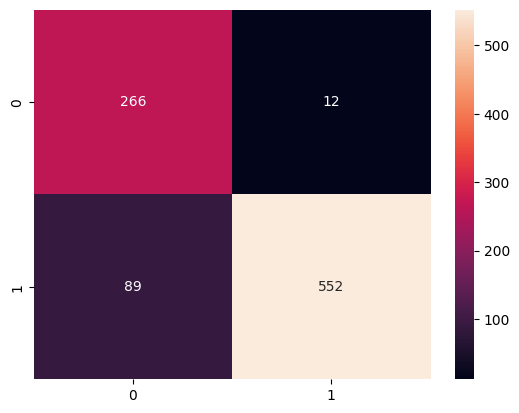

In [27]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d",)

AUC Score: 0.9785575595685698


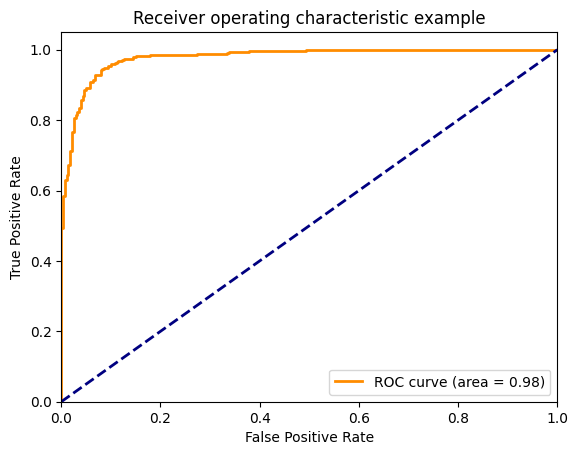

In [28]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

fpr , tpr , thresholds = roc_curve ( y_test , preds)
auc_keras = auc(fpr, tpr)
print("AUC Score:",auc_keras)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_keras)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()